In [30]:
import numpy as np
from numpy import arange
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import pickle

In [7]:
from sklearn.linear_model import Ridge

In [8]:
model_name = "ridge_regression"
display_name = "Ridge Regression"

In [9]:
y_test = pd.read_csv('y_test.csv')
file = open("Selection Methods","rb")
sel_methods = np.load(file)

In [10]:
def get_best_model(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '.csv').values
    x_test = pd.read_csv('x_test' + method + '.csv').values
    pipe = Pipeline([('clf', Ridge())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [11]:
def save_model(model,method):
    with open('CrimeGUI/Models/'+model_name+method,'wb') as file:
        pickle.dump(model,file)

In [12]:
print(sel_methods)

['_f_regression' '_chi2' '_adaboost' '_equal_crime_and_business'
 '_all_business']


<h3>F-Regression feature selected dataset<h3>

In [8]:
is_sample = False
num_folds = 10
args = {}

In [9]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.



Best score for Ridge Regression with _f_regression dataset: 0.7440061247913899

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge())]
verbose : False
clf : Ridge()
clf__alpha : 1.0
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : None
clf__solver : auto
clf__tol : 0.001

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.842362147889453
Mean Absolute error: 1.3790856484948688
R^2: 0.751574939883525


[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.1s finished


In [10]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [11]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 2832 tasks      | elapsed:   18.5s
[Parallel(n_jobs=6)]: Done 5192 tasks      | elapsed:   36.2s
[Parallel(n_jobs=6)]: Done 8834 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 13548 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 18044 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23464 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 30720 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 37120 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 44918 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 52650 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 62378 tasks      | elapsed:  8.6min
[Parallel(n_jobs=6)]: Done 72160 tasks      | elapsed:  9.8min
[Parallel(n_jobs=6)]: Done 83550 tasks      | ela


Best score for Ridge Regression with _f_regression dataset: 0.7441120478633996

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge(alpha=4, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=4, random_state=7, solver='saga', tol=0.09)
clf__alpha : 4
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.834785382725304
Mean Absolute error: 1.375431242708831
R^2: 0.7519636465279076


In [8]:
#highest alpha selected, explored further and broader
is_sample = False
num_folds = 10
args = {'clf__alpha':(4,4.5,5,5.5,6,6.5,7,7.5,8,8.5,9,9.5,10),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [9]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 14560 candidates, totalling 145600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.4s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    7.0s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   20.2s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   37.2s
[Parallel(n_jobs=6)]: Done 9532 tasks      | elapsed:   57.1s
[Parallel(n_jobs=6)]: Done 14196 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 19396 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 25588 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 32556 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 40492 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 49396 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 59100 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 69376 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 80644 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 92484 tasks      | ela


Best score for Ridge Regression with _f_regression dataset: 0.7441746210602058

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge(alpha=10, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=10, random_state=7, solver='saga', tol=0.09)
clf__alpha : 10
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.833691987980102
Mean Absolute error: 1.3762805158442817
R^2: 0.7520197403612502


In [18]:
#highest alpha selected again, explored further and broader
is_sample = False
num_folds = 10
args = {'clf__alpha':(10,12,14,16,18,20,25,30,35,40,45,50),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [19]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 13440 candidates, totalling 134400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    8.5s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   20.5s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   37.6s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:   59.4s
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 19300 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 26524 tasks      | elapsed:  2.7min
[Parallel(n_jobs=6)]: Done 33324 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 40168 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 50188 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 59664 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 69664 tasks      | elapsed:  6.9min
[Parallel(n_jobs=6)]: Done 80464 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 92976 tasks      | ela


Best score for Ridge Regression with _f_regression dataset: 0.7441746210602058

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge(alpha=10, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=10, random_state=7, solver='saga', tol=0.09)
clf__alpha : 10
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.833691987980102
Mean Absolute error: 1.3762805158442817
R^2: 0.7520197403612502


In [27]:
# alpha settled around 10, explored further
is_sample = False
num_folds = 10
args = {'clf__alpha':(9.6,9.7,9.8,9.9,10,10.1,10.2,10.3,10.4,10.5,10.6,10.7,10.8,10.9,
                      11,11.1,11.2,11.3,11.4,11.5,11.6,11.7,11.8,11.9),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [28]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 26880 candidates, totalling 268800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1780 tasks      | elapsed:    9.8s
[Parallel(n_jobs=6)]: Done 3780 tasks      | elapsed:   19.5s
[Parallel(n_jobs=6)]: Done 6580 tasks      | elapsed:   35.4s
[Parallel(n_jobs=6)]: Done 11408 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 15504 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 21152 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 27616 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 35556 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 44036 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 53380 tasks      | elapsed:  4.9min
[Parallel(n_jobs=6)]: Done 63012 tasks      | elapsed:  5.8min
[Parallel(n_jobs=6)]: Done 73012 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 84532 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 96132 tasks      | el


Best score for Ridge Regression with _f_regression dataset: 0.7441769019320252

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge(alpha=10.7, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=10.7, random_state=7, solver='saga', tol=0.09)
clf__alpha : 10.7
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.833673501504229
Mean Absolute error: 1.376390855742041
R^2: 0.7520206887628236


In [8]:
# alpha explored to two decimal places
is_sample = False
num_folds = 10
args = {'clf__alpha':(10.61,10.62,10.63,10.64,10.65,10.66,10.67,10.68,10.69,10.7,
                      10.71,10.72,10.73,10.74,10.75,10.76,10.77,10.78,10.79),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [9]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 21280 candidates, totalling 212800 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    6.6s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   19.1s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   34.5s
[Parallel(n_jobs=6)]: Done 10028 tasks      | elapsed:   55.8s
[Parallel(n_jobs=6)]: Done 15564 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 21644 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 28588 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 36948 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 44996 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 58612 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 69636 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 81460 tasks      | elapsed:  7.3min
[Parallel(n_jobs=6)]: Done 93412 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 106164 tasks      | e


Best score for Ridge Regression with _f_regression dataset: 0.7441770810797713

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge(alpha=10.77, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=10.77, random_state=7, solver='saga', tol=0.09)
clf__alpha : 10.77
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.833672715491442
Mean Absolute error: 1.376401941837922
R^2: 0.7520207290872083


In [15]:
# Parameters finalised, model saved
is_sample = False
num_folds = 10
args = {'clf__alpha':([10.77]),
        'clf__copy_X':([True]),
        'clf__fit_intercept':([True]),
        'clf__normalize':([False]),
        'clf__solver':(['saga']),
        'clf__random_state':([7]),
        'clf__tol':([0.09])}

In [16]:
f_reg_model, f_reg_train_score, f_reg_mse, f_reg_mae, f_reg_r2 = get_best_model(sel_methods[0], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _f_regression dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    1.1s finished



Best score for Ridge Regression with _f_regression dataset: 0.7441770810797713

Best hyperparameters for Ridge Regression with _f_regression dataset:
memory : None
steps : [('clf', Ridge(alpha=10.77, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=10.77, random_state=7, solver='saga', tol=0.09)
clf__alpha : 10.77
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _f_regression :
Mean Squared error: 4.833672715491442
Mean Absolute error: 1.376401941837922
R^2: 0.7520207290872083


In [17]:
save_model(f_reg_model,sel_methods[0])

<h3>Chi-Squared feature selected dataset<h3>

In [12]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [13]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _chi2 dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 3504 tasks      | elapsed:   27.1s
[Parallel(n_jobs=6)]: Done 5716 tasks      | elapsed:   48.0s
[Parallel(n_jobs=6)]: Done 9556 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 13692 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 18466 tasks      | elapsed:  2.4min
[Parallel(n_jobs=6)]: Done 24128 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 31278 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 37354 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 46160 tasks      | elapsed:  6.2min
[Parallel(n_jobs=6)]: Done 54954 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 65582 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done 76136 tasks      | elapsed: 10.3min
[Parallel(n_jobs=6)]: Done 86322 tasks      | ela


Best score for Ridge Regression with _chi2 dataset: 0.7280124450628319

Best hyperparameters for Ridge Regression with _chi2 dataset:
memory : None
steps : [('clf', Ridge(alpha=1.3, random_state=7, solver='saga', tol=0.09))]
verbose : False
clf : Ridge(alpha=1.3, random_state=7, solver='saga', tol=0.09)
clf__alpha : 1.3
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.09

Prediction scores for Ridge Regression using _chi2 :
Mean Squared error: 5.293382720017615
Mean Absolute error: 1.4472685918055532
R^2: 0.7284364778431465


In [10]:
# Parameters in expected range, alpha and tol tuned to two decimal places
is_sample = False
num_folds = 10
args = {'clf__alpha':(1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,12.9,1.3,1.31,1.32,1.33,1.34,1.35,1.36,1.37,1.38,1.39),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99)}

In [11]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _chi2 dataset
Fitting 10 folds for each of 20216 candidates, totalling 202160 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    7.1s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   16.5s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   29.7s
[Parallel(n_jobs=6)]: Done 11156 tasks      | elapsed:   51.4s
[Parallel(n_jobs=6)]: Done 19956 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 30356 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 42356 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 55956 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 71156 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 87956 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 106356 tasks      | elapsed:  8.1min
[Parallel(n_jobs=6)]: Done 126356 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 147956 tasks      | elapsed: 11.2min
[Parallel(n_jobs=6)]: Done 171156 tasks      


Best score for Ridge Regression with _chi2 dataset: 0.7277537483389354

Best hyperparameters for Ridge Regression with _chi2 dataset:
memory : None
steps : [('clf', Ridge(alpha=1.21, random_state=7, solver='svd', tol=0.81))]
verbose : False
clf : Ridge(alpha=1.21, random_state=7, solver='svd', tol=0.81)
clf__alpha : 1.21
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : svd
clf__tol : 0.81

Prediction scores for Ridge Regression using _chi2 :
Mean Squared error: 5.25450030158521
Mean Absolute error: 1.4530717523526167
R^2: 0.7304312413163316


In [11]:
# Lowest alpha and tol selected, explored further
is_sample = False
num_folds = 10
args = {'clf__alpha':(1.11,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,1.21,1.22,1.23,1.24,1.25,1.26,1.27,1.28,12.9,1.3),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79,0.8,0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9)}

In [12]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _chi2 dataset
Fitting 10 folds for each of 22400 candidates, totalling 224000 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    7.4s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   17.7s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   29.8s
[Parallel(n_jobs=6)]: Done 10724 tasks      | elapsed:   49.3s
[Parallel(n_jobs=6)]: Done 19524 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 29924 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 41924 tasks      | elapsed:  3.2min
[Parallel(n_jobs=6)]: Done 55524 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 70724 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 87524 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 105924 tasks      | elapsed:  7.9min
[Parallel(n_jobs=6)]: Done 125924 tasks      | elapsed:  9.4min
[Parallel(n_jobs=6)]: Done 147524 tasks      | elapsed: 10.9min
[Parallel(n_jobs=6)]: Done 170724 tasks      


Best score for Ridge Regression with _chi2 dataset: 0.7277542805756234

Best hyperparameters for Ridge Regression with _chi2 dataset:
memory : None
steps : [('clf', Ridge(alpha=1.11, random_state=7, solver='svd', tol=0.71))]
verbose : False
clf : Ridge(alpha=1.11, random_state=7, solver='svd', tol=0.71)
clf__alpha : 1.11
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : svd
clf__tol : 0.71

Prediction scores for Ridge Regression using _chi2 :
Mean Squared error: 5.254519916894833
Mean Absolute error: 1.4530417816905126
R^2: 0.7304302350028169


In [18]:
# alpha and tol deviated however test and train accuracies are unchanged therefore model finalised 
# Lowest alpha and tol selected, explored further
is_sample = False
num_folds = 10
args = {'clf__alpha':([1.11]),
        'clf__copy_X':([True]),
        'clf__fit_intercept':([True]),
        'clf__normalize':([False]),
        'clf__solver':(['svd']),
        'clf__random_state':([7]),
        'clf__tol':([0.71])}

In [19]:
chi2_model, chi2_train_score, chi2_mse, chi2_mae, chi2_r2 = get_best_model(sel_methods[1], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _chi2 dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.0s finished



Best score for Ridge Regression with _chi2 dataset: 0.7277542805756234

Best hyperparameters for Ridge Regression with _chi2 dataset:
memory : None
steps : [('clf', Ridge(alpha=1.11, random_state=7, solver='svd', tol=0.71))]
verbose : False
clf : Ridge(alpha=1.11, random_state=7, solver='svd', tol=0.71)
clf__alpha : 1.11
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : svd
clf__tol : 0.71

Prediction scores for Ridge Regression using _chi2 :
Mean Squared error: 5.254519916894833
Mean Absolute error: 1.4530417816905126
R^2: 0.7304302350028169


In [20]:
save_model(chi2_model,sel_methods[1])

<h3>AdaBoost feature selected dataset<h3>

In [14]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [15]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _adaboost dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 2928 tasks      | elapsed:   19.6s
[Parallel(n_jobs=6)]: Done 5616 tasks      | elapsed:   45.8s
[Parallel(n_jobs=6)]: Done 8614 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12030 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 17218 tasks      | elapsed:  2.3min
[Parallel(n_jobs=6)]: Done 23164 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 29150 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 35504 tasks      | elapsed:  4.8min
[Parallel(n_jobs=6)]: Done 43166 tasks      | elapsed:  5.9min
[Parallel(n_jobs=6)]: Done 52398 tasks      | elapsed:  7.2min
[Parallel(n_jobs=6)]: Done 61268 tasks      | elapsed:  8.3min
[Parallel(n_jobs=6)]: Done 71530 tasks      | elapsed:  9.6min
[Parallel(n_jobs=6)]: Done 81996 tasks      | ela


Best score for Ridge Regression with _adaboost dataset: 0.741285265369401

Best hyperparameters for Ridge Regression with _adaboost dataset:
memory : None
steps : [('clf', Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=7,
      solver='sag', tol=0.06))]
verbose : False
clf : Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=7,
      solver='sag', tol=0.06)
clf__alpha : 0.5
clf__copy_X : True
clf__fit_intercept : False
clf__max_iter : None
clf__normalize : True
clf__random_state : 7
clf__solver : sag
clf__tol : 0.06

Prediction scores for Ridge Regression using _adaboost :
Mean Squared error: 4.9680391071612835
Mean Absolute error: 1.3773327512732494
R^2: 0.7451274034934662


In [14]:
# Parameters in expected range, alpha and tol tuned to two decimal places
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,0.5,0.51,0.52,0.53,0.54,0.55,0.56,0.57,0.58,0.59),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09)}

In [15]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _adaboost dataset
Fitting 10 folds for each of 9576 candidates, totalling 95760 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.5s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    9.0s
[Parallel(n_jobs=6)]: Done 3054 tasks      | elapsed:   21.6s
[Parallel(n_jobs=6)]: Done 5854 tasks      | elapsed:   40.6s
[Parallel(n_jobs=6)]: Done 9208 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 13362 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 18274 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 23782 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 30594 tasks      | elapsed:  3.6min
[Parallel(n_jobs=6)]: Done 37948 tasks      | elapsed:  4.5min
[Parallel(n_jobs=6)]: Done 45856 tasks      | elapsed:  5.4min
[Parallel(n_jobs=6)]: Done 54522 tasks      | elapsed:  6.5min
[Parallel(n_jobs=6)]: Done 64192 tasks      | elapsed:  7.6min
[Parallel(n_jobs=6)]: Done 74746 tasks      | elapsed:  8.8min
[Parallel(n_jobs=6)]: Done 85812 tasks      | ela


Best score for Ridge Regression with _adaboost dataset: 0.741285265369401

Best hyperparameters for Ridge Regression with _adaboost dataset:
memory : None
steps : [('clf', Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=7,
      solver='sag', tol=0.06))]
verbose : False
clf : Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=7,
      solver='sag', tol=0.06)
clf__alpha : 0.5
clf__copy_X : True
clf__fit_intercept : False
clf__max_iter : None
clf__normalize : True
clf__random_state : 7
clf__solver : sag
clf__tol : 0.06

Prediction scores for Ridge Regression using _adaboost :
Mean Squared error: 4.9680391071612835
Mean Absolute error: 1.3773327512732494
R^2: 0.7451274034934662


In [21]:
# Parameters stabablised, model saved
is_sample = False
num_folds = 10
args = {'clf__alpha':([0.5]),
        'clf__copy_X':([True]),
        'clf__fit_intercept':([False]),
        'clf__normalize':([True]),
        'clf__solver':(['sag']),
        'clf__random_state':([7]),
        'clf__tol':([0.06])}

In [22]:
ada_model, ada_train_score, ada_mse, ada_mae, ada_r2 = get_best_model(sel_methods[2], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _adaboost dataset
Fitting 10 folds for each of 1 candidates, totalling 10 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.



Best score for Ridge Regression with _adaboost dataset: 0.741285265369401

Best hyperparameters for Ridge Regression with _adaboost dataset:
memory : None
steps : [('clf', Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=7,
      solver='sag', tol=0.06))]
verbose : False
clf : Ridge(alpha=0.5, fit_intercept=False, normalize=True, random_state=7,
      solver='sag', tol=0.06)
clf__alpha : 0.5
clf__copy_X : True
clf__fit_intercept : False
clf__max_iter : None
clf__normalize : True
clf__random_state : 7
clf__solver : sag
clf__tol : 0.06

Prediction scores for Ridge Regression using _adaboost :
Mean Squared error: 4.9680391071612835
Mean Absolute error: 1.3773327512732494
R^2: 0.7451274034934662


[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=6)]: Done  10 out of  10 | elapsed:    0.2s finished


In [23]:
save_model(ada_model,sel_methods[2])

<h3>Equal business and crime feature selected dataset<h3>

In [16]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [17]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _equal_crime_and_business dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 2928 tasks      | elapsed:   18.7s
[Parallel(n_jobs=6)]: Done 5716 tasks      | elapsed:   43.9s
[Parallel(n_jobs=6)]: Done 9564 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 13710 tasks      | elapsed:  1.7min
[Parallel(n_jobs=6)]: Done 18910 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 24500 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 31416 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 38926 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 47338 tasks      | elapsed:  5.7min
[Parallel(n_jobs=6)]: Done 55986 tasks      | elapsed:  6.8min
[Parallel(n_jobs=6)]: Done 65086 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 74696 tasks      | elapsed:  9.0min
[Parallel(n_jobs=6)]: Done 86160 tasks      | ela


Best score for Ridge Regression with _equal_crime_and_business dataset: 0.7287811394452313

Best hyperparameters for Ridge Regression with _equal_crime_and_business dataset:
memory : None
steps : [('clf', Ridge(alpha=2, random_state=7, solver='saga', tol=0.05))]
verbose : False
clf : Ridge(alpha=2, random_state=7, solver='saga', tol=0.05)
clf__alpha : 2
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.05

Prediction scores for Ridge Regression using _equal_crime_and_business :
Mean Squared error: 5.13039430901731
Mean Absolute error: 1.4164940183566836
R^2: 0.7367981832597243


In [17]:
# Parameters in expected range, alpha and tol tuned to two decimal places
is_sample = False
num_folds = 10
args = {'clf__alpha':(1.91,1.92,1.93,1.94,1.95,1.96,1.97,1.98,1.99,2,2.01,2.02,2.03,2.04,2.05,2.06,2.07,2.08,2.09),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [18]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _equal_crime_and_business dataset
Fitting 10 folds for each of 10640 candidates, totalling 106400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    8.0s
[Parallel(n_jobs=6)]: Done 3300 tasks      | elapsed:   19.5s
[Parallel(n_jobs=6)]: Done 6100 tasks      | elapsed:   36.8s
[Parallel(n_jobs=6)]: Done 9700 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 14100 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 19300 tasks      | elapsed:  2.0min
[Parallel(n_jobs=6)]: Done 25300 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 32100 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 39700 tasks      | elapsed:  4.1min
[Parallel(n_jobs=6)]: Done 48100 tasks      | elapsed:  5.0min
[Parallel(n_jobs=6)]: Done 57300 tasks      | elapsed:  6.0min
[Parallel(n_jobs=6)]: Done 67300 tasks      | elapsed:  7.1min
[Parallel(n_jobs=6)]: Done 78100 tasks      | elapsed:  8.2min
[Parallel(n_jobs=6)]: Done 89700 tasks      | ela


Best score for Ridge Regression with _equal_crime_and_business dataset: 0.7287811394452313

Best hyperparameters for Ridge Regression with _equal_crime_and_business dataset:
memory : None
steps : [('clf', Ridge(alpha=2, random_state=7, solver='saga', tol=0.05))]
verbose : False
clf : Ridge(alpha=2, random_state=7, solver='saga', tol=0.05)
clf__alpha : 2
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.05

Prediction scores for Ridge Regression using _equal_crime_and_business :
Mean Squared error: 5.13039430901731
Mean Absolute error: 1.4164940183566836
R^2: 0.7367981832597243


<h3> Retrain on revised dataset <h3>

In [24]:
def get_best_model_revised(method, args, _cv, is_sample):
    sample_string = ''
    if (is_sample):
        sample_string = '_sample'
    y_train = pd.read_csv('y_train'+ sample_string + '_revised.csv')    
    method_string = method
    if (method == ''):
        method_string = "no feature selection"
    print('\n\nRunning cross fold validation for',display_name,'with',method_string,'dataset')
    x_train = pd.read_csv('x_train' + method + sample_string + '_revised.csv').values
    x_test = pd.read_csv('x_test' + method + '_revised.csv').values
    pipe = Pipeline([('clf', Ridge())])
    grid = GridSearchCV(pipe, args, cv = _cv, verbose = 1, scoring = 'r2', n_jobs=6)
    grid.fit(x_train, y_train.values.ravel())
    print('\nBest score for',display_name,'with',method_string,"dataset:",grid.best_score_)
    best_args = grid.best_estimator_.get_params()
    print('\nBest hyperparameters for',display_name,'with',method_string,'dataset:')
    for arg in best_args:
        print(arg,":",best_args[arg])
    y_test_predict = grid.predict(x_test)
    mse = mean_squared_error(y_test,y_test_predict)
    mae = mean_absolute_error(y_test,y_test_predict)
    r2 = r2_score(y_test,y_test_predict)
    print('\nPrediction scores for',display_name,'using',method_string,':')
    print('Mean Squared error:',mse)
    print('Mean Absolute error:',mae)
    print('R^2:',r2)
    return grid.best_estimator_,grid.best_score_,mse,mae,r2

In [25]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [26]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _equal_crime_and_business dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.2s
[Parallel(n_jobs=6)]: Done 2544 tasks      | elapsed:   17.8s
[Parallel(n_jobs=6)]: Done 4634 tasks      | elapsed:   35.0s
[Parallel(n_jobs=6)]: Done 7910 tasks      | elapsed:  1.0min
[Parallel(n_jobs=6)]: Done 12912 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 17860 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 23314 tasks      | elapsed:  3.0min
[Parallel(n_jobs=6)]: Done 30726 tasks      | elapsed:  3.8min
[Parallel(n_jobs=6)]: Done 37178 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 44944 tasks      | elapsed:  5.6min
[Parallel(n_jobs=6)]: Done 52992 tasks      | elapsed:  6.6min
[Parallel(n_jobs=6)]: Done 63496 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 73408 tasks      | elapsed:  9.0min
[Parallel(n_jobs=6)]: Done 84126 tasks      | ela


Best score for Ridge Regression with _equal_crime_and_business dataset: 0.7289130267113955

Best hyperparameters for Ridge Regression with _equal_crime_and_business dataset:
memory : None
steps : [('clf', Ridge(alpha=3.3, random_state=7, solver='saga', tol=0.05))]
verbose : False
clf : Ridge(alpha=3.3, random_state=7, solver='saga', tol=0.05)
clf__alpha : 3.3
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.05

Prediction scores for Ridge Regression using _equal_crime_and_business :
Mean Squared error: 5.127876935536402
Mean Absolute error: 1.4164317050439221
R^2: 0.7369273306962917


In [32]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(3.25,3.35,0.01)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [33]:
equal_model, equal_train_score, equal_mse, equal_mae, equal_r2 = get_best_model_revised(sel_methods[3], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _equal_crime_and_business dataset
Fitting 10 folds for each of 6160 candidates, totalling 61600 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.3s
[Parallel(n_jobs=6)]: Done 1132 tasks      | elapsed:    7.3s
[Parallel(n_jobs=6)]: Done 3132 tasks      | elapsed:   20.9s
[Parallel(n_jobs=6)]: Done 5932 tasks      | elapsed:   36.7s
[Parallel(n_jobs=6)]: Done 9532 tasks      | elapsed:   57.6s
[Parallel(n_jobs=6)]: Done 13932 tasks      | elapsed:  1.4min
[Parallel(n_jobs=6)]: Done 19132 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 25132 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 31932 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 39532 tasks      | elapsed:  3.9min
[Parallel(n_jobs=6)]: Done 47932 tasks      | elapsed:  4.7min
[Parallel(n_jobs=6)]: Done 57132 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 61589 out of 61600 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=6)]: Done 61600 out of 61600 | elapsed:  6.0min finished



Best score for Ridge Regression with _equal_crime_and_business dataset: 0.7289130267113955

Best hyperparameters for Ridge Regression with _equal_crime_and_business dataset:
memory : None
steps : [('clf', Ridge(alpha=3.299999999999999, random_state=7, solver='saga', tol=0.05))]
verbose : False
clf : Ridge(alpha=3.299999999999999, random_state=7, solver='saga', tol=0.05)
clf__alpha : 3.299999999999999
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : saga
clf__tol : 0.05

Prediction scores for Ridge Regression using _equal_crime_and_business :
Mean Squared error: 5.127876935536402
Mean Absolute error: 1.4164317050439221
R^2: 0.7369273306962917


In [36]:
# Hyperparameters stable, model pickled
save_model(equal_model,sel_methods[3])

<h3>Business only feature selected dataset<h3>

In [18]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [19]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _all_business dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    6.1s
[Parallel(n_jobs=6)]: Done 2928 tasks      | elapsed:   19.2s
[Parallel(n_jobs=6)]: Done 5192 tasks      | elapsed:   40.3s
[Parallel(n_jobs=6)]: Done 7682 tasks      | elapsed:  1.2min
[Parallel(n_jobs=6)]: Done 11226 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 15530 tasks      | elapsed:  2.5min
[Parallel(n_jobs=6)]: Done 19534 tasks      | elapsed:  3.1min
[Parallel(n_jobs=6)]: Done 26826 tasks      | elapsed:  4.0min
[Parallel(n_jobs=6)]: Done 33280 tasks      | elapsed:  5.1min
[Parallel(n_jobs=6)]: Done 40882 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 49140 tasks      | elapsed:  7.5min
[Parallel(n_jobs=6)]: Done 56836 tasks      | elapsed:  8.6min
[Parallel(n_jobs=6)]: Done 66232 tasks      | elapsed:  9.9min
[Parallel(n_jobs=6)]: Done 76476 tasks      | ela


Best score for Ridge Regression with _all_business dataset: 0.45213725011471845

Best hyperparameters for Ridge Regression with _all_business dataset:
memory : None
steps : [('clf', Ridge(alpha=0.9, random_state=7, solver='sag', tol=0.05))]
verbose : False
clf : Ridge(alpha=0.9, random_state=7, solver='sag', tol=0.05)
clf__alpha : 0.9
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : sag
clf__tol : 0.05

Prediction scores for Ridge Regression using _all_business :
Mean Squared error: 10.564771118612764
Mean Absolute error: 1.8413850963687415
R^2: 0.45800131834375724


In [20]:
# Parameters in expected range, alpha and tol tuned to two decimal places
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.81,0.82,0.83,0.84,0.85,0.86,0.87,0.88,0.89,0.9,0.91,0.92,0.93,0.94,0.95,0.96,0.97,0.98,0.99),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.01, 0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1)}

In [21]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _all_business dataset
Fitting 10 folds for each of 10640 candidates, totalling 106400 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    8.4s
[Parallel(n_jobs=6)]: Done 2962 tasks      | elapsed:   22.9s
[Parallel(n_jobs=6)]: Done 5670 tasks      | elapsed:   43.6s
[Parallel(n_jobs=6)]: Done 8454 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 12108 tasks      | elapsed:  1.6min
[Parallel(n_jobs=6)]: Done 16248 tasks      | elapsed:  2.2min
[Parallel(n_jobs=6)]: Done 20986 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 25758 tasks      | elapsed:  3.5min
[Parallel(n_jobs=6)]: Done 32410 tasks      | elapsed:  4.4min
[Parallel(n_jobs=6)]: Done 38768 tasks      | elapsed:  5.2min
[Parallel(n_jobs=6)]: Done 47124 tasks      | elapsed:  6.3min
[Parallel(n_jobs=6)]: Done 55064 tasks      | elapsed:  7.4min
[Parallel(n_jobs=6)]: Done 63550 tasks      | elapsed:  8.6min
[Parallel(n_jobs=6)]: Done 73380 tasks      | ela


Best score for Ridge Regression with _all_business dataset: 0.4521378739224602

Best hyperparameters for Ridge Regression with _all_business dataset:
memory : None
steps : [('clf', Ridge(alpha=0.93, random_state=7, solver='sag', tol=0.05))]
verbose : False
clf : Ridge(alpha=0.93, random_state=7, solver='sag', tol=0.05)
clf__alpha : 0.93
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : sag
clf__tol : 0.05

Prediction scores for Ridge Regression using _all_business :
Mean Squared error: 10.56383375357707
Mean Absolute error: 1.8414427038799475
R^2: 0.45804940747014466


<h3> Retrain on revised dataset <h3>

In [27]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1,1.1,1.2,1.3,1.4,1.5,1.6,1.7,1.8,1.9,2,
                     2.1,2.2,2.3,2.4,2.5,2.6,2.7,2.8,2.9,3,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,4),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.001, 0.002,0.003,0.004,0.005,0.006,0.007,0.008,0.009,0.01, 0.02,0.03,0.04,0.05,0.06,
                    0.07,0.08,0.09,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1)}

In [28]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _all_business dataset
Fitting 10 folds for each of 62720 candidates, totalling 627200 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.3s
[Parallel(n_jobs=6)]: Done 1790 tasks      | elapsed:   13.2s
[Parallel(n_jobs=6)]: Done 3766 tasks      | elapsed:   33.6s
[Parallel(n_jobs=6)]: Done 6188 tasks      | elapsed:   57.0s
[Parallel(n_jobs=6)]: Done 9758 tasks      | elapsed:  1.5min
[Parallel(n_jobs=6)]: Done 13551 tasks      | elapsed:  2.1min
[Parallel(n_jobs=6)]: Done 18130 tasks      | elapsed:  2.8min
[Parallel(n_jobs=6)]: Done 23292 tasks      | elapsed:  3.7min
[Parallel(n_jobs=6)]: Done 29652 tasks      | elapsed:  4.6min
[Parallel(n_jobs=6)]: Done 36074 tasks      | elapsed:  5.5min
[Parallel(n_jobs=6)]: Done 44000 tasks      | elapsed:  6.7min
[Parallel(n_jobs=6)]: Done 51108 tasks      | elapsed:  7.8min
[Parallel(n_jobs=6)]: Done 59768 tasks      | elapsed:  8.9min
[Parallel(n_jobs=6)]: Done 70576 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 81904 tasks      | ela


Best score for Ridge Regression with _all_business dataset: 0.45105517806450013

Best hyperparameters for Ridge Regression with _all_business dataset:
memory : None
steps : [('clf', Ridge(alpha=1.2, random_state=7, solver='sag', tol=0.1))]
verbose : False
clf : Ridge(alpha=1.2, random_state=7, solver='sag', tol=0.1)
clf__alpha : 1.2
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : sag
clf__tol : 0.1

Prediction scores for Ridge Regression using _all_business :
Mean Squared error: 10.59780585953644
Mean Absolute error: 1.861412677127212
R^2: 0.4563065550754888


In [34]:
is_sample = False
num_folds = 10
args = {'clf__alpha':(arange(1.15,1.25,0.01)),
        'clf__copy_X':(True,False),
        'clf__fit_intercept':(True,False),
        'clf__normalize':(True,False),
        'clf__solver':('auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'),
        'clf__random_state':([7]),
        'clf__tol':(0.005,0.006,0.007,0.008,0.009,0.01,0.011,0.012,0.013,0.014,0.015)}

In [35]:
bus_model, bus_train_score, bus_mse, bus_mae, bus_r2 = get_best_model_revised(sel_methods[4], args, num_folds, is_sample)



Running cross fold validation for Ridge Regression with _all_business dataset
Fitting 10 folds for each of 6776 candidates, totalling 67760 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done 100 tasks      | elapsed:    0.4s
[Parallel(n_jobs=6)]: Done 1300 tasks      | elapsed:    7.8s
[Parallel(n_jobs=6)]: Done 3002 tasks      | elapsed:   29.6s
[Parallel(n_jobs=6)]: Done 5348 tasks      | elapsed:   51.9s
[Parallel(n_jobs=6)]: Done 7808 tasks      | elapsed:  1.3min
[Parallel(n_jobs=6)]: Done 11448 tasks      | elapsed:  1.9min
[Parallel(n_jobs=6)]: Done 15498 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 20330 tasks      | elapsed:  3.3min
[Parallel(n_jobs=6)]: Done 25890 tasks      | elapsed:  4.2min
[Parallel(n_jobs=6)]: Done 32354 tasks      | elapsed:  5.3min
[Parallel(n_jobs=6)]: Done 39104 tasks      | elapsed:  6.4min
[Parallel(n_jobs=6)]: Done 47134 tasks      | elapsed:  7.7min
[Parallel(n_jobs=6)]: Done 55530 tasks      | elapsed:  9.2min
[Parallel(n_jobs=6)]: Done 64562 tasks      | elapsed: 10.6min
[Parallel(n_jobs=6)]: Done 67760 out of 67760 | e


Best score for Ridge Regression with _all_business dataset: 0.45097682853769294

Best hyperparameters for Ridge Regression with _all_business dataset:
memory : None
steps : [('clf', Ridge(alpha=1.23, random_state=7, solver='sag', tol=0.01))]
verbose : False
clf : Ridge(alpha=1.23, random_state=7, solver='sag', tol=0.01)
clf__alpha : 1.23
clf__copy_X : True
clf__fit_intercept : True
clf__max_iter : None
clf__normalize : False
clf__random_state : 7
clf__solver : sag
clf__tol : 0.01

Prediction scores for Ridge Regression using _all_business :
Mean Squared error: 10.597233361145701
Mean Absolute error: 1.8533565686503803
R^2: 0.45633592564769976


In [37]:
# Hyperparameters stable, model pickled
save_model(bus_model,sel_methods[4])

<h3>Visualise scores<h3>

In [38]:
training_scores = [f_reg_train_score, chi2_train_score, ada_train_score, equal_train_score, bus_train_score]
mse_scores = [f_reg_mse, chi2_mse, ada_mse, equal_mse, bus_mse]
mae_scores = [f_reg_mae, chi2_mae, ada_mae, equal_mae, bus_mae]
r2_scores = [f_reg_r2, chi2_r2, ada_r2, equal_r2, bus_r2]
datasets = ["F-Regression","Chi-Squared","AdaBoost","Equal Business\nand Crime","All Business"]
y_select = np.arange(len(datasets))

<BarContainer object of 5 artists>

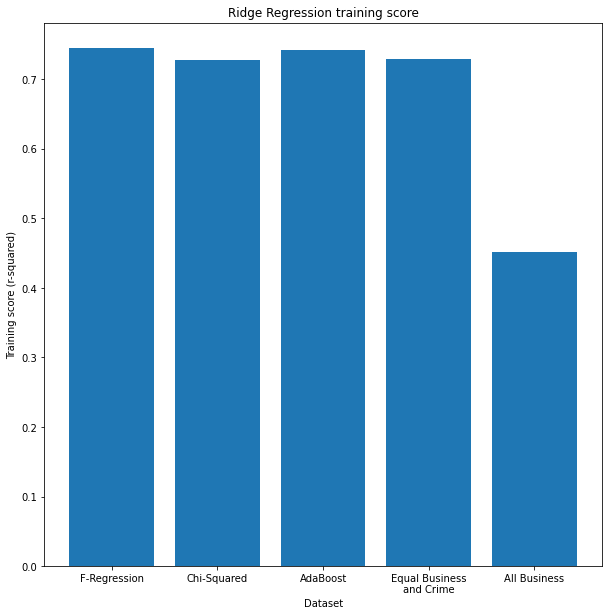

In [39]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Ridge Regression training score")
plt.xlabel("Dataset")
plt.ylabel("Training score (r-squared)")
plt.bar(y_select, training_scores)

<BarContainer object of 5 artists>

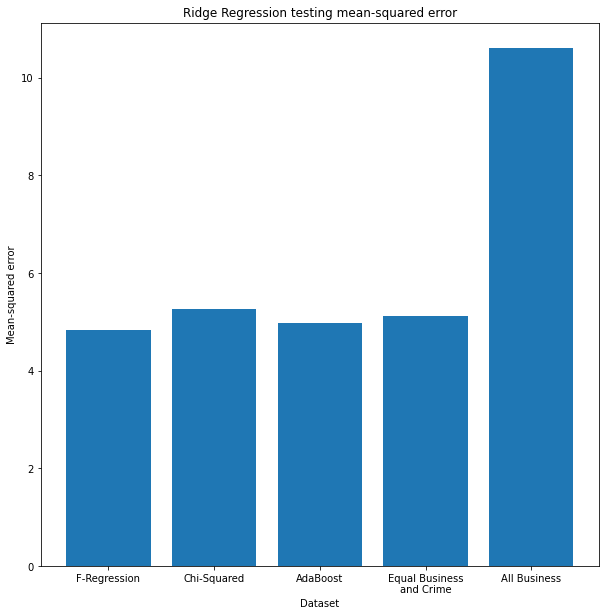

In [40]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Ridge Regression testing mean-squared error")
plt.xlabel("Dataset")
plt.ylabel("Mean-squared error")
plt.bar(y_select, mse_scores)

<BarContainer object of 5 artists>

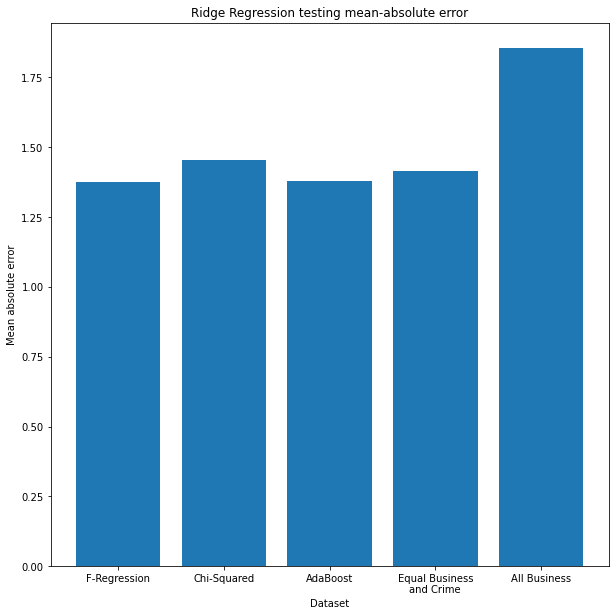

In [41]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Ridge Regression testing mean-absolute error")
plt.xlabel("Dataset")
plt.ylabel("Mean absolute error")
plt.bar(y_select, mae_scores)

<BarContainer object of 5 artists>

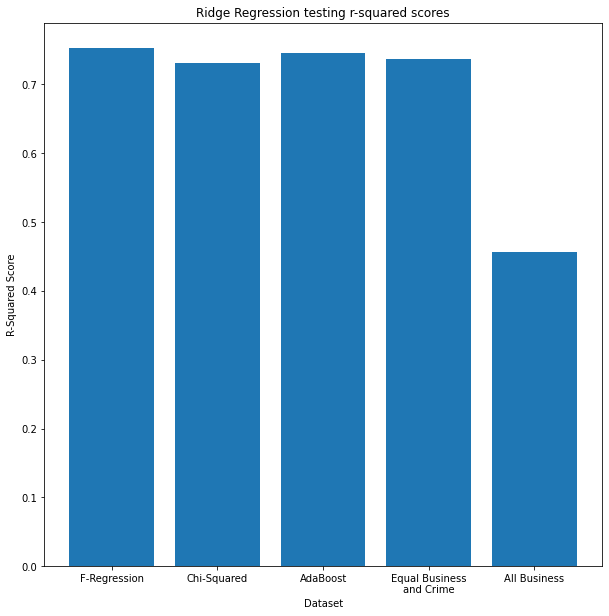

In [42]:
plt.figure(figsize = (10,10))
plt.xticks(y_select,datasets)
plt.title("Ridge Regression testing r-squared scores")
plt.xlabel("Dataset")
plt.ylabel("R-Squared Score")
plt.bar(y_select, r2_scores)

In [ ]:
# f-regression performing best in both train and test